# Curves raster
For each unit, plot a raster of all the time the mouse went through a curve (quickly enough).

In [1]:
# imports
import sys
import matplotlib.pyplot as plt
from pathlib import Path

sys.path.append("./")
sys.path.append(r"C:\Users\Federico\Documents\GitHub\pysical_locomotion")

from fcutils.plot.figure import clean_axes
from analysis.ephys.viz import time_aligned_raster
from analysis.ephys.utils import get_recording_names, get_data, get_session_bouts, curves, get_roi_crossings

save_folder = Path(r"D:\Dropbox (UCL)\Rotation_vte\Locomotion\analysis\ephys")

# print all available recordings
print(get_recording_names())


[06/07/22 17:20:58] DEBUG    DPL - Saving data and logs to logs                   ]8;id=479675;file://c:\ProgramData\Miniconda3\envs\dev\lib\site-packages\tpd\core.py\core.py]8;;\:]8;id=443217;file://c:\ProgramData\Miniconda3\envs\dev\lib\site-packages\tpd\core.py#118\118]8;;\

                    DEBUG    Saving log file to: logs\log.log                     ]8;id=415591;file://c:\ProgramData\Miniconda3\envs\dev\lib\site-packages\tpd\core.py\core.py]8;;\:]8;id=330921;file://c:\ProgramData\Miniconda3\envs\dev\lib\site-packages\tpd\core.py#119\119]8;;\

Connecting root@127.0.0.1:3306


[06/07/22 17:21:00] DEBUG    Connected to database: LOCOMOTION                 ]8;id=759425;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\data\dbase\__init__.py\__init__.py]8;;\:]8;id=143562;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\data\dbase\__init__.py#11\11]8;;\

['FC_220408_BAA1101192_hairpin' 'FC_220409_BAA1101192_hairpin'
 'FC_220410_BAA1101192_hairpin' 'FC_220411_BAA1101192_hairpin'
 'FC_220412_BAA1101192_hairpin' 'FC_220413_BAA1101192_hairpin'
 'FC_220414_BAA1101192_hairpin' 'FC_220415_BAA1101192_hairpin'
 'FC_220432_BAA1101192_hairpin' 'FC_220433_BAA1101192_hairpin'
 'FC_220434_BAA1101192_hairpin' 'FC_220435_BAA1101192_hairpin']


In [2]:
REC = "FC_220410_BAA1101192_hairpin"

units, left_fl, right_fl, left_hl, right_hl, body = get_data(REC)
out_bouts = get_session_bouts(REC, complete=None)
in_bouts = get_session_bouts(REC, direction="inbound", complete=None)


[06/07/22 17:21:03] INFO     Got tracking data for FC_220410_BAA1101192_hairpin  ]8;id=748419;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=651978;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#163\163]8;;\

[06/07/22 17:21:04] INFO     Got 40 units for FC_220410_BAA1101192_hairpin       ]8;id=174695;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=956116;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#177\177]8;;\

[06/07/22 17:21:18] INFO     Got 76 bouts for FC_220410_BAA1101192_hairpin |     ]8;id=519805;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=167748;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             None | outbound

[06/07/22 17:21:19] INFO     Got 65 bouts for FC_220410_BAA1101192_hairpin |     ]8;id=602883;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=234042;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             None | inbound

In [3]:
def make_figure(unit, out_bouts, in_bouts, body):
    fig = plt.figure(figsize=(22, 18))
    axes = fig.subplot_mosaic(
    """
        ABCDEFGH
        11223344
        55667788
    """
    )
    fig.tight_layout()

    out_traj_axes = "ACEG"
    in_traj_axes = "BDFH"


    for i, curve in enumerate(curves.keys()):
        crossings = get_roi_crossings(out_bouts, curve, direction="out")
        in_crossings = get_roi_crossings(in_bouts, curve, direction="in")

        # plot crossings trajectories
        for n, cross in crossings.iterrows():
            axes[out_traj_axes[i]].scatter(
                body.x[cross.session_start_frame:cross.session_end_frame],
                body.y[cross.session_start_frame:cross.session_end_frame],
                c=body.speed[cross.session_start_frame:cross.session_end_frame],
                vmin=0, vmax=100, cmap="inferno", alpha=.5, s=10
            )

        for n, cross in in_crossings.iterrows():
            axes[in_traj_axes[i]].scatter(
                body.x[cross.session_start_frame:cross.session_end_frame],
                body.y[cross.session_start_frame:cross.session_end_frame],
                c=body.speed[cross.session_start_frame:cross.session_end_frame],
                vmin=0, vmax=100, cmap="inferno", alpha=.5, s=10
            )
        axes[in_traj_axes[i]].set(title=f"{len(in_crossings)} curve crossings")
        axes[out_traj_axes[i]].set(title=f"{len(crossings)} curve crossings")

        # plot crossings rasters
        time_aligned_raster(axes[str(i+1)], unit, crossings["at_apex"].values / 60, dt=.1)
        time_aligned_raster(axes[str(i+5)], unit, in_crossings["at_apex"].values / 60, dt=.1)


    for ax in "ABCDEFGH":
        axes[ax].axis("equal")
        axes[ax].axis("off")
    clean_axes(fig)
    return fig

make all figures

[06/07/22 17:31:44] INFO     Got tracking data for FC_220408_BAA1101192_hairpin  ]8;id=690171;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=300896;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#163\163]8;;\

[06/07/22 17:31:45] INFO     Got 44 units for FC_220408_BAA1101192_hairpin       ]8;id=135774;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=491735;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#177\177]8;;\

[06/07/22 17:31:46] INFO     Got 41 bouts for FC_220408_BAA1101192_hairpin |     ]8;id=811651;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=721342;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             None | outbound

[06/07/22 17:31:47] INFO     Got 40 bouts for FC_220408_BAA1101192_hairpin |     ]8;id=696284;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=607687;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             None | inbound

[06/07/22 17:31:49] INFO     Got tracking data for FC_220409_BAA1101192_hairpin  ]8;id=505784;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=743169;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#163\163]8;;\

[06/07/22 17:31:50] INFO     Got 44 units for FC_220409_BAA1101192_hairpin       ]8;id=542770;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=550668;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#177\177]8;;\

[06/07/22 17:31:51] INFO     Got 48 bouts for FC_220409_BAA1101192_hairpin |     ]8;id=296259;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=703872;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             None | outbound

                    INFO     Got 49 bouts for FC_220409_BAA1101192_hairpin |     ]8;id=44338;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=984289;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             None | inbound

[06/07/22 17:31:53] INFO     Got tracking data for FC_220410_BAA1101192_hairpin  ]8;id=822759;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=336741;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#163\163]8;;\

[06/07/22 17:31:54] INFO     Got 40 units for FC_220410_BAA1101192_hairpin       ]8;id=152303;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=518686;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#177\177]8;;\

[06/07/22 17:31:56] INFO     Got 76 bouts for FC_220410_BAA1101192_hairpin |     ]8;id=419738;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=949260;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             None | outbound

[06/07/22 17:31:57] INFO     Got 65 bouts for FC_220410_BAA1101192_hairpin |     ]8;id=832542;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=104611;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             None | inbound

                    WARNING  No tracking data for FC_220411_BAA1101192_hairpin   ]8;id=179921;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=102445;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#154\154]8;;\

[06/07/22 17:31:59] INFO     Got tracking data for FC_220412_BAA1101192_hairpin  ]8;id=82798;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=801092;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#163\163]8;;\

                    INFO     Got 42 units for FC_220412_BAA1101192_hairpin       ]8;id=664267;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=786613;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#177\177]8;;\

                    INFO     Got 0 bouts for FC_220412_BAA1101192_hairpin | None ]8;id=5487;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=983031;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             | outbound

                    INFO     Got 0 bouts for FC_220412_BAA1101192_hairpin | None ]8;id=735686;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=134390;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             | inbound

[06/07/22 17:32:02] INFO     Got tracking data for FC_220413_BAA1101192_hairpin  ]8;id=276522;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=939308;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#163\163]8;;\

[06/07/22 17:32:03] INFO     Got 55 units for FC_220413_BAA1101192_hairpin       ]8;id=373916;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=115305;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#177\177]8;;\

                    INFO     Got 0 bouts for FC_220413_BAA1101192_hairpin | None ]8;id=371744;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=972086;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             | outbound

                    INFO     Got 0 bouts for FC_220413_BAA1101192_hairpin | None ]8;id=890767;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=629376;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             | inbound

[06/07/22 17:32:05] INFO     Got tracking data for FC_220414_BAA1101192_hairpin  ]8;id=650782;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=438852;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#163\163]8;;\

[06/07/22 17:32:06] INFO     Got 56 units for FC_220414_BAA1101192_hairpin       ]8;id=614759;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=212666;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#177\177]8;;\

                    INFO     Got 0 bouts for FC_220414_BAA1101192_hairpin | None ]8;id=960545;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=636976;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             | outbound

                    INFO     Got 0 bouts for FC_220414_BAA1101192_hairpin | None ]8;id=337516;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=887326;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             | inbound

[06/07/22 17:32:08] INFO     Got tracking data for FC_220415_BAA1101192_hairpin  ]8;id=926729;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=307460;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#163\163]8;;\

[06/07/22 17:32:09] INFO     Got 52 units for FC_220415_BAA1101192_hairpin       ]8;id=322776;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=390868;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#177\177]8;;\

                    INFO     Got 0 bouts for FC_220415_BAA1101192_hairpin | None ]8;id=516703;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=262684;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             | outbound

                    INFO     Got 0 bouts for FC_220415_BAA1101192_hairpin | None ]8;id=587006;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=817523;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             | inbound

[06/07/22 17:32:11] INFO     Got tracking data for FC_220432_BAA1101192_hairpin  ]8;id=886677;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=784425;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#163\163]8;;\

[06/07/22 17:32:12] INFO     Got 40 units for FC_220432_BAA1101192_hairpin       ]8;id=94508;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=639927;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#177\177]8;;\

[06/07/22 17:32:13] INFO     Got 64 bouts for FC_220432_BAA1101192_hairpin |     ]8;id=563844;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=447287;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             None | outbound

[06/07/22 17:32:14] INFO     Got 61 bouts for FC_220432_BAA1101192_hairpin |     ]8;id=499111;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=753243;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             None | inbound

[06/07/22 17:32:20] INFO     Got tracking data for FC_220433_BAA1101192_hairpin  ]8;id=558209;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=189550;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#163\163]8;;\

[06/07/22 17:32:21] INFO     Got 47 units for FC_220433_BAA1101192_hairpin       ]8;id=967906;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=26424;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#177\177]8;;\

[06/07/22 17:32:24] INFO     Got 110 bouts for FC_220433_BAA1101192_hairpin |    ]8;id=701059;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=169379;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             None | outbound

[06/07/22 17:32:26] INFO     Got 120 bouts for FC_220433_BAA1101192_hairpin |    ]8;id=934504;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=900667;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             None | inbound

[06/07/22 17:36:56] INFO     Got tracking data for FC_220434_BAA1101192_hairpin  ]8;id=607997;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=22086;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#163\163]8;;\

[06/07/22 17:36:57] INFO     Got 74 units for FC_220434_BAA1101192_hairpin       ]8;id=707971;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=971358;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#177\177]8;;\

[06/07/22 17:37:00] INFO     Got 87 bouts for FC_220434_BAA1101192_hairpin |     ]8;id=232774;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=728493;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             None | outbound

[06/07/22 17:37:02] INFO     Got 89 bouts for FC_220434_BAA1101192_hairpin |     ]8;id=947448;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py\utils.py]8;;\:]8;id=894267;file://C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\ephys\utils.py#201\201]8;;\
                             None | inbound

KeyboardInterrupt: 

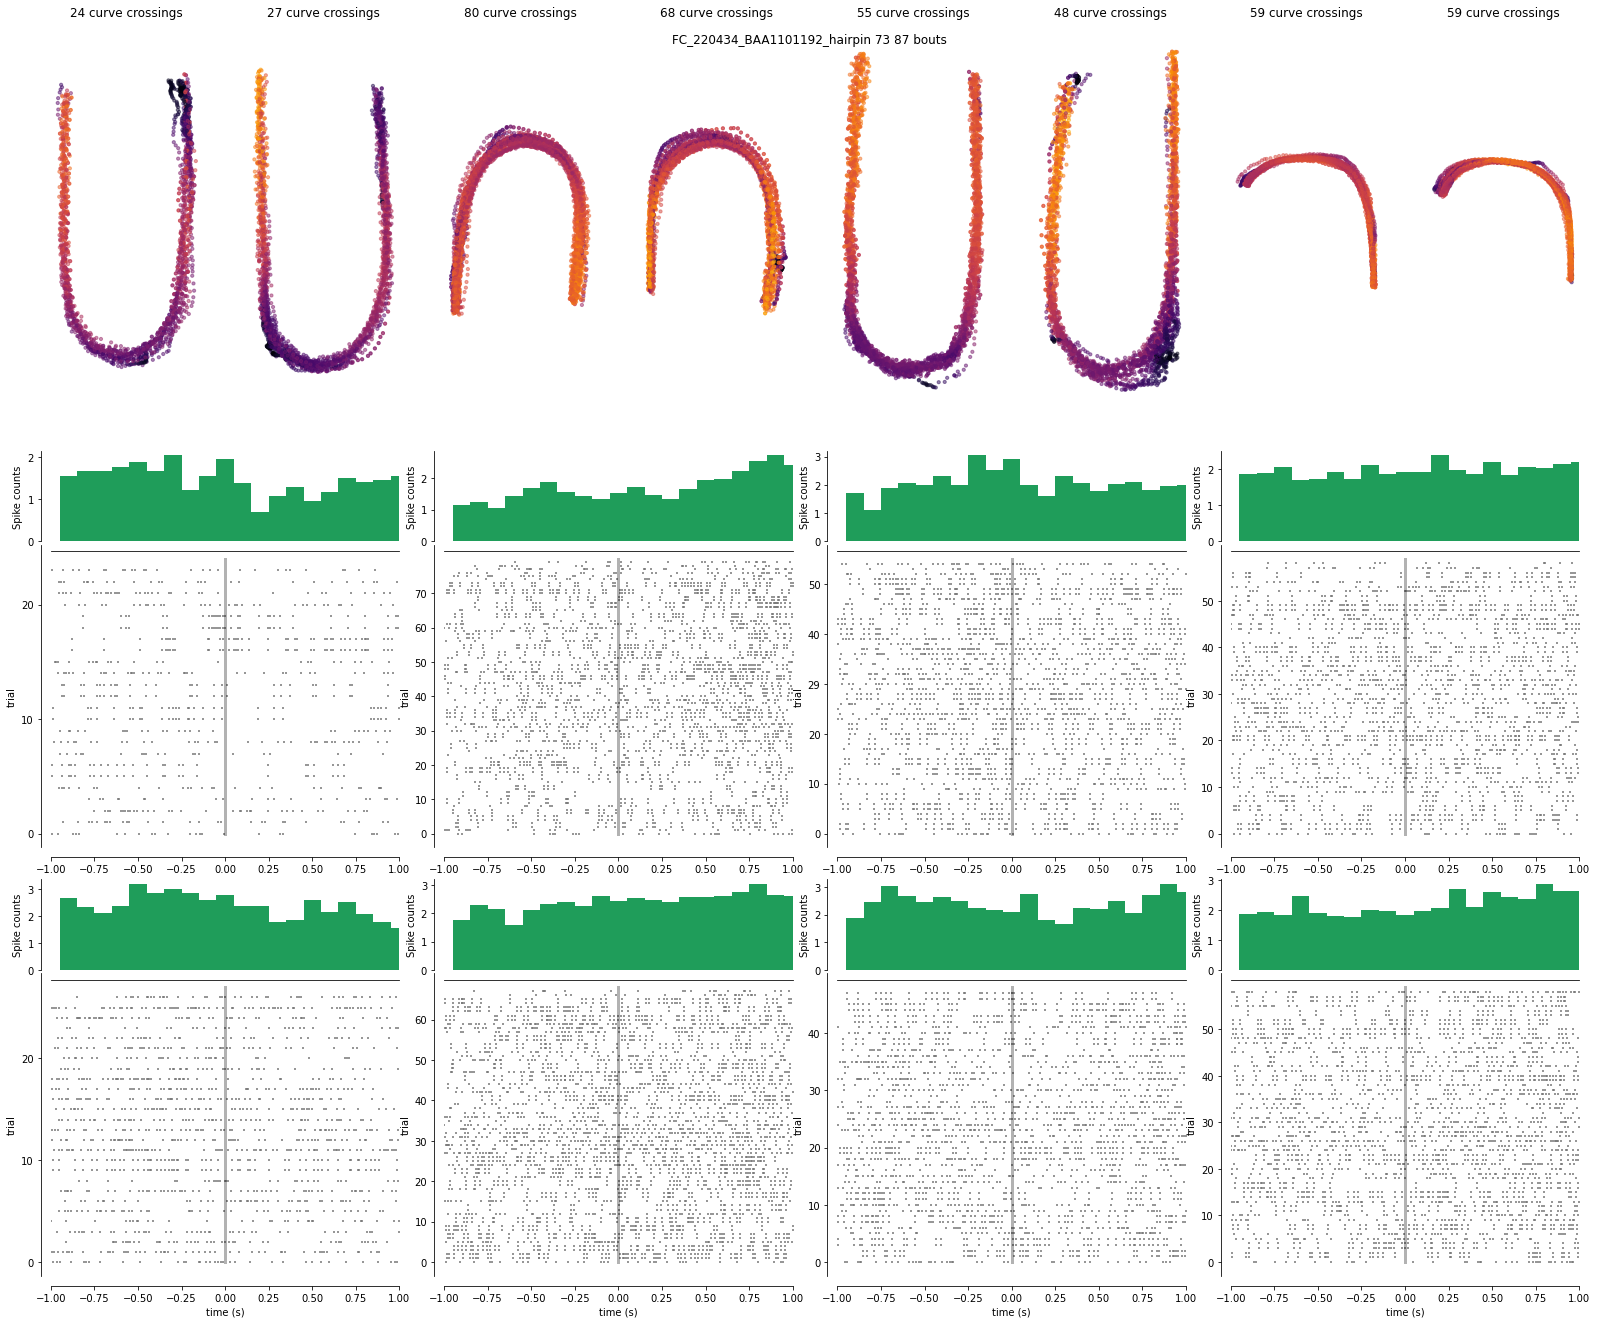

In [5]:
for REC in get_recording_names():
    dest = save_folder / REC / "curves_rasters"
    dest.mkdir(exist_ok=True, parents=True)

    units, left_fl, right_fl, left_hl, right_hl, body = get_data(REC)
    if units is None:
        continue

    out_bouts = get_session_bouts(REC, complete=None)
    in_bouts = get_session_bouts(REC, direction="inbound", complete=None)

    for (i, unit) in units.iterrows():
        region = unit.brain_region[:3]
        savepath= dest / f"{region}_{unit.unit_id}.png"
        if savepath.exists():
            continue


        fig = make_figure(unit, out_bouts, in_bouts, body)
        fig.suptitle(f"{REC} {unit.name} {len(out_bouts)} bouts")

        fig.savefig(savepath, dpi=300, transparent=False, facecolor='w', edgecolor='w')

        # close figure 
        plt.close(fig)
    #     break
    # break